## 특징공학

In [30]:
data = [{"price":12000000, "room":3, "location": "잠실동"},
       {"price":700000000, "room":4, "location": "천호동"},
       {"price":1200000000, "room":4, "location": "신천동"},
       {"price":700000000, "room":2, "location": "천호동"}]
data

[{'price': 12000000, 'room': 3, 'location': '잠실동'},
 {'price': 700000000, 'room': 4, 'location': '천호동'},
 {'price': 1200000000, 'room': 4, 'location': '신천동'},
 {'price': 700000000, 'room': 2, 'location': '천호동'}]

In [31]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer #문자를 벡터로 변환?
 
dv = DictVectorizer(sparse = True,dtype = np.int)
dv.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [24]:
dir(dv)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_iterable_element',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_transform',
 '_validate_data',
 'dtype',
 'fit',
 'fit_transform',
 'get_feature_names',
 'get_params',
 'inverse_transform',
 'restrict',
 'separator',
 'set_params',
 'sort',
 'sparse',
 'transform']

In [16]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False,dtype = np.int)
# dv = DictVectorizer(sparse = False,dtype = np.int32) 
dv.fit_transform(data)

# 저장할 수 있는 범위를 넘어선 경우 나오는 오류
# OverflowError: Python int too large to convert to C long
# 이럴 경우 범위를 줄이거나 늘려준다. ex) int32 >> int64

OverflowError: Python int too large to convert to C long

In [26]:
data1 = [{"price":1200000000, "room":3, "location": "잠실동"},
       {"price":700000000, "room":4, "location": "천호동"},
       {"price":1200000000, "room":4, "location": "신천동"},
       {"price":700000000, "room":2, "location": "천호동"},
       {"price":800000000, "room":3, "location": "방화동"},
       {"price":1000000000, "room":3, "location": "마곡동"}]
data1

[{'price': 1200000000, 'room': 3, 'location': '잠실동'},
 {'price': 700000000, 'room': 4, 'location': '천호동'},
 {'price': 1200000000, 'room': 4, 'location': '신천동'},
 {'price': 700000000, 'room': 2, 'location': '천호동'},
 {'price': 800000000, 'room': 3, 'location': '방화동'},
 {'price': 1000000000, 'room': 3, 'location': '마곡동'}]

In [27]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False,dtype = np.int)
dv.fit_transform(data1)

array([[         0,          0,          0,          1,          0,
        1200000000,          3],
       [         0,          0,          0,          0,          1,
         700000000,          4],
       [         0,          0,          1,          0,          0,
        1200000000,          4],
       [         0,          0,          0,          0,          1,
         700000000,          2],
       [         0,          1,          0,          0,          0,
         800000000,          3],
       [         1,          0,          0,          0,          0,
        1000000000,          3]])

In [28]:
dv.get_feature_names()

['location=마곡동',
 'location=방화동',
 'location=신천동',
 'location=잠실동',
 'location=천호동',
 'price',
 'room']

### 텍스트의 특징변화

In [45]:
text = ["mobile phone",
       "battlegrounds mobile game",
       "phone game"]

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(text)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [47]:
import pandas as pd

pd.DataFrame(X.toarray(), columns = cv.get_feature_names())

,battlegrounds,game,mobile,phone
0,0,0,1,1
1,1,1,1,0
2,0,1,0,1


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
#전체 나온 문장에서 나온 단어의 비중을 나타내는 함수
tv = TfidfVectorizer()
X = tv.fit_transform(text)
X


<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [49]:
pd.DataFrame(X.toarray(), columns =tv.get_feature_names())

,battlegrounds,game,mobile,phone
0,0.000000,0.000000,0.707107,0.707107
1,0.680919,0.517856,0.517856,0.000000
2,0.000000,0.707107,0.000000,0.707107


### 누락데이터 대체

In [55]:
!pip install -U scikit-learn

In [59]:
X = np.array([[np.nan, 0, 3],
             [3, 7, 9],
             [3, 5, 2],
             [4, np.nan, 6],
             [8, 8, 1]])

y = np.array([14, 16, -1, 8, -5])


In [60]:
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import SimpleImputer
imp = SimpleImputer(strategy="mean")
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X2,y)
y_pred = model.predict(X2)
y_pred

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

# redwine 실습
   - 사용할 라이브러리 load(numpy, pandas, matplotlib)
   - winequality-red.csv 읽기
   - type 컬러를 만들어 red로 채우기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
redwine = pd.read_csv("winequality-red.csv",sep =";") # csv파일의 구분이 ;(sep 넣어야함)과,은 구분해야한다.
# header = 2 : 2번째 자료부터 사용하겠다
redwine["type"] ="red"
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [3]:
redwine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


#### whitewine

In [4]:
whitewine = pd.read_csv("winequality-white.csv",sep =";")
whitewine["type"]="white"
whitewine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


#### redwine,whitwine 합치기

In [5]:
redwine.shape

(1599, 13)

In [6]:
whitewine.shape

(4898, 13)

In [7]:
wine = redwine.append(whitewine)
wine.shape

(6497, 13)

In [8]:
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


In [9]:
wine.tail(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


#### type column의 분포는(white, red 각각)

In [10]:
wine["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [11]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

#### 컬럼명에서 공백을 "_"로 변경

In [12]:
# new_col = ["fixed_acidity","volatile_acidity","33","44",
#            "55","66","77","88","99","10","110","120","130"]
# wine.columns = new_col 예시

In [13]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [14]:
wine.columns = wine.columns.str.replace(" ","_") #컬럼 이름 변경
wine 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [15]:
wine.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


#### 요약 통계량 보기

In [16]:
wine.describe() #std = 표준편차

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [17]:
wine["quality"]

0       5
1       5
2       5
3       6
4       5
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 6497, dtype: int64

In [18]:
wine.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

#### quality 컬럼의 값 종류

In [19]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [20]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

#### quality 칼럼의 빈도수

In [21]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [22]:
#index 순으로 정렬

In [23]:
wine.quality.value_counts().sort_values()

9       5
3      30
8     193
4     216
7    1079
5    2138
6    2836
Name: quality, dtype: int64

#### 와인 종류별 품질의 기술통계량

In [24]:
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [25]:
wine.groupby(["type","quality"])["pH"].describe()

count      mean       std   min     25%    50%    75%   max
type  quality                                                              
red   3          10.0  3.398000  0.144052  3.16  3.3125  3.390  3.495  3.63
      4          53.0  3.381509  0.181441  2.74  3.3000  3.370  3.500  3.90
      5         681.0  3.304949  0.150618  2.88  3.2000  3.300  3.400  3.74
      6         638.0  3.318072  0.153995  2.86  3.2200  3.320  3.410  4.01
      7         199.0  3.290754  0.150101  2.92  3.2000  3.280  3.380  3.78
      8          18.0  3.267222  0.200640  2.88  3.1625  3.230  3.350  3.72
white 3          20.0  3.187500  0.209834  2.87  3.0350  3.215  3.325  3.55
      4         163.0  3.182883  0.163691  2.83  3.0700  3.160  3.280  3.72
      5        1457.0  3.168833  0.140895  2.79  3.0800  3.160  3.240  3.79
      6        2198.0  3.188599  0.150996  2.72  3.0800  3.180  3.280  3.81
      7         880.0  3.213898  0.158402  2.84  3.1000  3.200  3.320  3.82
      8         175.0  3.218686  0.152289  2.94  3.1200  3.230  3.330  3.59
      9           5.0  3.308000  0.082885  3.20  3.2800  3.280  3.370  3.41

In [26]:
wine.groupby(["type","quality","fixed_acidity"])["pH"].describe().head(3)

count  mean  std   min   25%   50%   75%   max
type quality fixed_acidity                                                
red  3       6.7              1.0  3.55  NaN  3.55  3.55  3.55  3.55  3.55
             6.8              1.0  3.32  NaN  3.32  3.32  3.32  3.32  3.32
             7.1              1.0  3.40  NaN  3.40  3.40  3.40  3.40  3.40

In [27]:
wine.groupby(["type","quality","fixed_acidity"])["pH"].describe().tail(3)

count  mean  std   min   25%   50%   75%   max
type  quality fixed_acidity                                                
white 9       7.1              1.0  3.37  NaN  3.37  3.37  3.37  3.37  3.37
              7.4              1.0  3.28  NaN  3.28  3.28  3.28  3.28  3.28
              9.1              1.0  3.20  NaN  3.20  3.20  3.20  3.20  3.20

#### 와인 종류별 품질의 사분위수

In [28]:
wine.groupby("type")["quality"].quantile([0,0.25,0.5,0.75,1])

type       
red    0.00    3.0
       0.25    5.0
       0.50    6.0
       0.75    6.0
       1.00    8.0
white  0.00    3.0
       0.25    5.0
       0.50    6.0
       0.75    6.0
       1.00    9.0
Name: quality, dtype: float64

In [29]:
wine.groupby("type")["quality"].quantile([0,0.25,0.5,0.75,1]).unstack("type")
# unstack("type")은 "type"으로 데이터프레임화

type,red,white
0.00,3.0,3.0
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0
1.00,8.0,9.0


C:\Users\691\.conda\envs\study\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


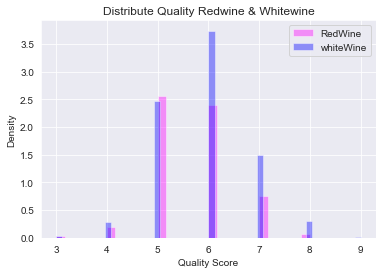

In [30]:
import seaborn as sns
red_q = wine.loc[wine["type"] == "red","quality"]
white_q = wine.loc[wine["type"] == "white","quality"]

sns.set_style("darkgrid")
sns.distplot(red_q,norm_hist=True, kde=False, color="magenta", label="RedWine")
sns.distplot(white_q,norm_hist=True, kde=False, color="blue", label="whiteWine")
# norm_hist=True, kde=False 옵션 변경가능

plt.title("Distribute Quality Redwine & Whitewine")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.legend()

In [31]:
wine.loc[wine["type"] == "red"]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [32]:
wine.loc[wine["type"] == "red","quality"]

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [33]:
wine[wine["type"] == "red"]["quality"]

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

#### 와인 종류별 품질 차이의 통계적 유의성 검정

In [34]:
wine.groupby("type")["quality"].aggregate(["std","mean"])

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


In [35]:
!pip install statsmodels


In [36]:
import statsmodels.api as sm

t_stat, p_value, df = sm.stats.ttest_ind(red_q,white_q)
"t-stat: {:.3f},p-value:{:.4f}, df:{}".format(t_stat, p_value, df)

't-stat: -9.686,p-value:0.0000, df:6495.0'

In [38]:
wine_corr = wine.corr()
wine_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


#### 상관분석 - 양의 상관 관계 가 있는 변수

In [40]:
wine_corr.loc[wine_corr["quality"] > 0, "quality"]

citric_acid            0.085532
free_sulfur_dioxide    0.055463
pH                     0.019506
sulphates              0.038485
alcohol                0.444319
quality                1.000000
Name: quality, dtype: float64

In [41]:
wine_corr.loc[wine_corr["quality"] < 0, "quality"]

fixed_acidity          -0.076743
volatile_acidity       -0.265699
residual_sugar         -0.036980
chlorides              -0.200666
total_sulfur_dioxide   -0.041385
density                -0.305858
Name: quality, dtype: float64

In [42]:
red_sample = wine.loc[wine["type"] == "red", :] #red, white와인 데이터 
white_sample = wine.loc[wine["type"] == "white", :] #분리 추출

In [49]:
wine.loc[wine["type"] == "red", :].head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


In [44]:
red_idx = np.random.choice(red_sample.index, replace=True, size=200) #각 집단별 추출할 샘플
white_idx = np.random.choice(white_sample.index, replace=True, size=200)#인덱스 200개 생성

In [50]:
red_idx[:5]

array([ 721,  370,  732, 1515,  450], dtype=int64)

In [52]:
wine_sample = red_sample.loc[red_idx, ].append(white_sample.loc[white_idx, ])
wine_sample.head(6) #생성한 인덱스를 통해 샘플 데이터 추출

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
721,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.20,5,red
370,6.9,0.765,0.02,2.30,0.063,35.0,63.0,0.99750,3.57,0.78,9.90,5,red
732,7.3,0.835,0.03,2.10,0.092,10.0,19.0,0.99660,3.39,0.47,9.60,5,red
1515,6.9,0.840,0.21,4.10,0.074,16.0,65.0,0.99842,3.53,0.72,9.25,6,red
450,11.9,0.390,0.69,2.80,0.095,17.0,35.0,0.99940,3.10,0.61,10.80,6,red
1229,7.6,0.430,0.29,2.10,0.075,19.0,66.0,0.99718,3.40,0.64,9.50,5,red


In [53]:
#pairplot >> 스캐터플롯, 히스토그램 지정한 갯수만 뽑아서 보여준다.

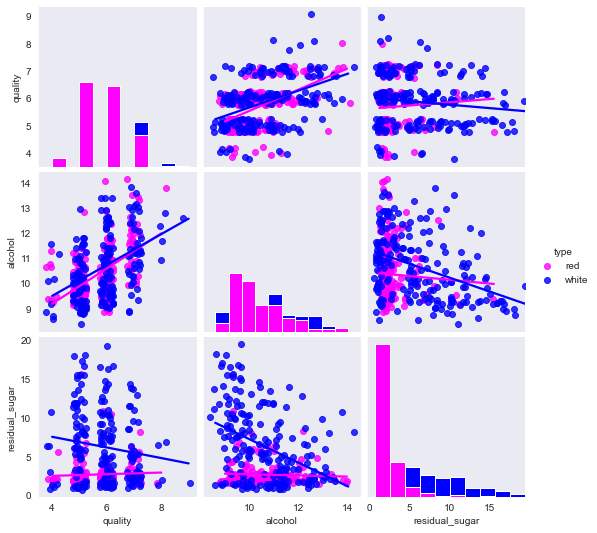

In [55]:
sns.set_style("dark")
sns.pairplot(wine_sample, vars=["quality","alcohol","residual_sugar"],
            kind="reg",plot_kws={"ci": False, "x_jitter":0.25,"y_jitter":0.25},
            diag_kind="hist",diag_kws={"bins":10, "alpha":1},
            hue="type",palette=dict(red="magenta",white="blue",markers=["o","s"]))

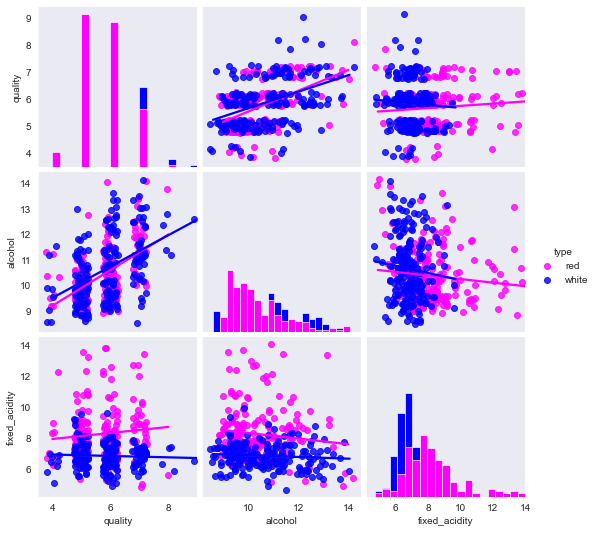

In [60]:
sns.set_style("dark")
sns.pairplot(wine_sample, vars=["quality","alcohol","fixed_acidity"],
            kind="reg",plot_kws={"ci": False, "x_jitter":0.25,"y_jitter":0.25},
            diag_kind="hist",diag_kws={"bins":20, "alpha":1},
            hue="type",palette=dict(red="magenta",white="blue",markers=["o","s"]))

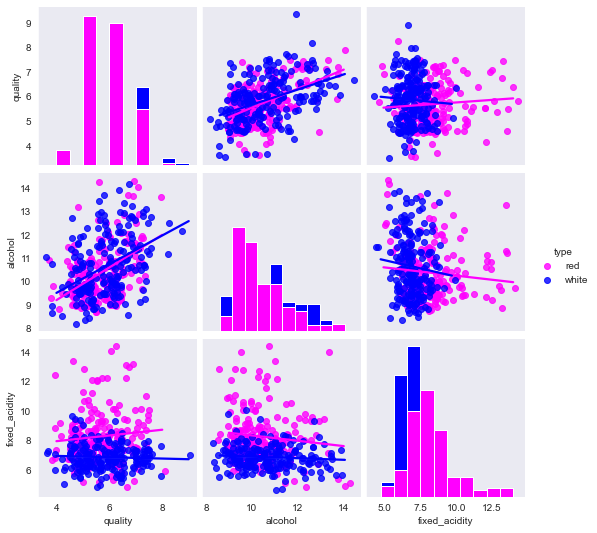

In [62]:
sns.set_style("dark")
sns.pairplot(wine_sample, vars=["quality","alcohol","fixed_acidity"],
            kind="reg",plot_kws={"ci": False, "x_jitter":0.5,"y_jitter":0.5},
            diag_kind="hist",diag_kws={"bins":10, "alpha":1},
            hue="type",palette=dict(red="magenta",white="blue",markers=["o","s"]))

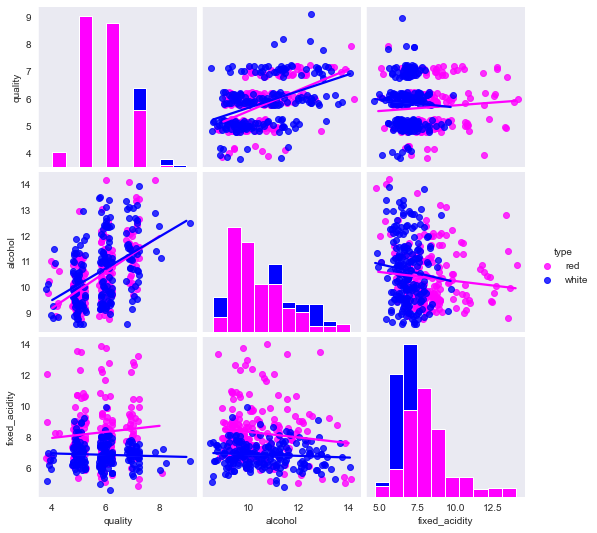

In [63]:
sns.set_style("dark")
sns.pairplot(wine_sample, vars=["quality","alcohol","fixed_acidity"],
            kind="reg",plot_kws={"ci": False, "x_jitter":0.25,"y_jitter":0.25},
            diag_kind="hist",diag_kws={"bins":10, "alpha":1},
            hue="type",palette=dict(red="magenta",white="blue",markers=["o","s"]))

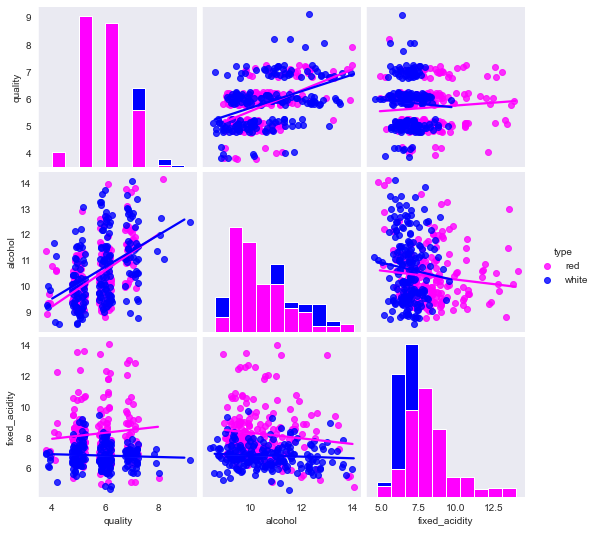

In [64]:
sns.set_style("dark")
sns.pairplot(wine_sample, vars=["quality","alcohol","fixed_acidity"],
            kind="reg",plot_kws={"ci": True, "x_jitter":0.25,"y_jitter":0.25},
            diag_kind="hist",diag_kws={"bins":10, "alpha":1},
            hue="type",palette=dict(red="magenta",white="blue",markers=["o","s"]))

In [65]:
wine.shape

(6497, 13)

In [67]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [70]:
wine.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


#### 특정행렬과 벡터의 추출

In [68]:
X = wine.drop(["type","quality"], axis = 1)
X.shape

(6497, 11)

In [69]:
y = wine.quality
y.shape

(6497,)

#### 모델 클래스와 모델 파라미터의 선택

In [93]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)
model

LinearRegression()

#### 훈련데이터와 테스트 데이터의 분리

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)
X_train.shape, X_test.shape, y_train.shape, X_test.shape

((4872, 11), (1625, 11), (4872,), (1625, 11))

#### 모델의 데이터 적합

In [96]:
model = LinearRegression(fit_intercept = True, n_jobs=None, normalize = True)
model.fit(X_train, y_train) #모델 훈련 코드

print("coef = ", model.coef_) #기울기
print("-"*30)
print("intercept = ", model.intercept_) # 절편

coef =  [ 5.55618691e-02 -1.29945358e+00 -1.08205046e-01  4.52070539e-02
 -3.95901596e-01  5.76479819e-03 -2.47760359e-03 -5.30023471e+01
  3.50283862e-01  7.49149475e-01  2.78530060e-01]
------------------------------
intercept =  54.05800385466532


In [97]:
model.intercept_

54.05800385466532

#### 새로운 데이터가 아래와 같을때 품질은?
      - [6.3,0.3,0.34,1.6,0.049,14,123,0.994,3.3,0.49,9.5]

In [98]:
data = [6.3,0.3,0.34,1.6,0.049,14,123,0.994,3.3,0.49,9.5]

#### 모델을 새로운 데이터에 적용

In [99]:
newdata = np.array([6.3,0.3,0.34,1.6,0.049,14,123,0.994,3.3,0.49,9.5])
model.predict(np.reshape(newdata, (1,11)))

array([5.2950344])

In [100]:
y_pred = model.predict(X_test)
y_pred.shape

(1625,)

#### 모델의 성능 측정

In [101]:
def rmse(y_real, y_pred):
    return np.sqrt(np.mean((y_real-y_pred)**2))

In [102]:
np.round(rmse(y_test, y_pred),2)

0.73

In [103]:
from sklearn.metrics import mean_squared_error

np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)

0.73

## LinearRegression temp

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#데이터 불러오기 제외된 코드
X = wine.drop(["type","quality"], axis = 1)
y = wine.quality

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

model = LinearRegression(fit_intercept = True, n_jobs=None, normalize = True)
model.fit(X_train, y_train)#모델 훈련 코드
print("coef = ", model.coef_) #기울기 / 없어도 상관없다.
print("-"*30) #보기 편하게 넣음
print("intercept = ", model.intercept_) # 절편

y_pred = model.predict(X_test)

np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)

coef =  [ 5.55618691e-02 -1.29945358e+00 -1.08205046e-01  4.52070539e-02
 -3.95901596e-01  5.76479819e-03 -2.47760359e-03 -5.30023471e+01
  3.50283862e-01  7.49149475e-01  2.78530060e-01]
------------------------------
intercept =  54.05800385466532


0.73

## 규제가 있는 선형 모델

#### 규제가 없는 선형모델의 적합
     - 리지, 라쏘, 엘라스틱넷

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#데이터 불러오기 제외된 코드
X = wine.drop(["type","quality"], axis = 1)
y = wine.quality

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

model = LinearRegression(fit_intercept = True, n_jobs=None, normalize = True)
model.fit(X_train, y_train)#모델 훈련 코드
print("coef = ", model.coef_) #기울기 / 없어도 상관없다.
print("-"*30) #보기 편하게 넣음
print("intercept = ", model.intercept_) # 절편

y_pred = model.predict(X_test)

np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

coef =  [ 5.55618691e-02 -1.29945358e+00 -1.08205046e-01  4.52070539e-02
 -3.95901596e-01  5.76479819e-03 -2.47760359e-03 -5.30023471e+01
  3.50283862e-01  7.49149475e-01  2.78530060e-01]
------------------------------
intercept =  54.05800385466532


0.725

#### 규제가 있는 선형 모델의 적합

In [106]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 0.05) # 규제 변수를 넣음/ 제곱값 사용
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

0.727

C:\Users\691\.conda\envs\study\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


Text(0.5, 1.0, 'ridge: alpha = 0.05, rmse = 0.727')

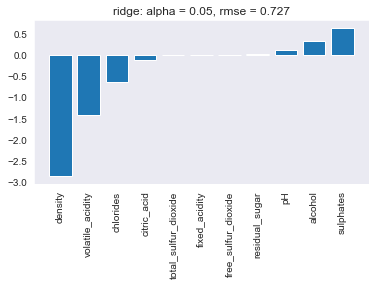

In [110]:
from sklearn.linear_model import Ridge

model_name = "ridge"
alpha = 0.05
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
coef = pd.Series(data=ridge.coef_, index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation = 90)
ax.set_title("{}: alpha = {}, rmse = {}".format(model_name, alpha, rmse))

# model = Ridge(alpha = 0.05) # 규제 변수를 넣음/ 제곱값 사용
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

In [107]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 0.05) # 규제 변수를 넣음(알아서 넣는다)/ 절대값 사용
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

0.761

C:\Users\691\.conda\envs\study\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


Text(0.5, 1.0, 'lasso: alpha = 0.05, rmse = 0.761')

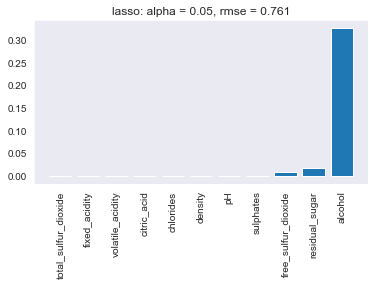

In [113]:
from sklearn.linear_model import Lasso

model_name = "lasso"
alpha = 0.05
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
coef = pd.Series(data=lasso.coef_, index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation = 90)
ax.set_title("{}: alpha = {}, rmse = {}".format(model_name, alpha, rmse))

# 유방암진단 분류를 위한 데이터 준비

#### 데이터프레임의 생성

In [122]:
breast_cancer = pd.read_csv("breast-cancer-wisconsin.data", header =None)
breast_cancer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### 데이터프레임의 컬럼 정보 갱신

In [123]:
breast_cancer.columns = ["id_number", "cluster_thickness",
                         "unif_cell_size", "unif_cell_shape",
                         "marg_adhesion", "single_epith_cell_size",
                         "bare_nuclei", "bland_chromatin",
                         "normal_nucleoli", "mitoses", "class"]

breast_cancer.head()

,id_number,cluster_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### 누락 값의 대체 및 클래스 레이블을 0과1로 변환

In [124]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_number               699 non-null    int64 
 1   cluster_thickness       699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marg_adhesion           699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [125]:
breast_cancer.isnull().values.sum()

0

In [119]:
#결측치 6번째
#클래스 10번째

In [129]:
import pandas as pd
breast_cancer["bare_nuclei"]= breast_cancer["bare_nuclei"].replace("?",np.NAN)
breast_cancer["bare_nuclei"] = \
breast_cancer["bare_nuclei"]= breast_cancer["bare_nuclei"].fillna(breast_cancer["bare_nuclei"].value_counts().index[0])

In [130]:
breast_cancer["cancer_ind"] = 0
breast_cancer.loc[breast_cancer["class"]==4, "cancer_ind"] = 1

In [131]:
breast_cancer

,id_number,cluster_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,cancer_ind
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,0
695,841769,2,1,1,1,2,1,1,1,1,2,0
696,888820,5,10,10,3,7,3,8,10,2,4,1
697,897471,4,8,6,4,3,4,10,6,1,4,1


#### 불필요한 변수 제거 및 표준화 적용

In [133]:
X = breast_cancer.drop(["id_number","class","cancer_ind"], axis=1)
y = breast_cancer.cancer_ind

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [136]:
from sklearn.preprocessing import StandardScaler #데이터 표준화 작업 객체생성
scaler = StandardScaler()

In [137]:
X_train_scaled = scaler.fit_transform(X_train) #훈련데이터,테스트 테이터를 표준화
X_test_scaled = scaler.transform(X_test)

In [140]:
X_train[:3]

,cluster_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
357,8,10,10,7,10,10,7,3,8
648,5,10,10,10,10,2,10,10,10
291,1,1,1,1,2,1,3,1,1


In [138]:
X_train_scaled[:3]

array([[ 1.23203096,  2.25737003,  2.24548782,  1.50338883,  2.99901619,
         1.71995381,  1.3873881 ,  0.0493974 ,  3.93974808],
       [ 0.16698121,  2.25737003,  2.24548782,  2.57661092,  2.99901619,
        -0.43660366,  2.57692542,  2.36566183,  5.16333449],
       [-1.25308511, -0.71708671, -0.76927481, -0.64305537, -0.55618118,
        -0.70617334, -0.19866165, -0.61239244, -0.34280437]])

#### 머신러닝 모델 클래스 KNeighborsClassifier를 이용한 학습

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # 기존데이터를 선택하여 거리를 
                                          # 비교한 후 분류
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [145]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

#### 분류모델의 혼동행렬, 정확도, AUC

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
y_pred = knn.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9761904761904762

In [148]:
confusion_matrix(y_test, y_pred)

array([[141,   2],
       [  3,  64]], dtype=int64)

In [149]:
roc_auc_score(y_test, y_pred) #1에 가까울 수록, 면적이 넓을 수록 좋음

0.9706189333055005

In [153]:
(141+64)/(64+141+2+3)

0.9761904761904762

#### 그리드 서치를 이용한 하이퍼파라미터의 최적 값 선택

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
grid_search = GridSearchCV(knn, {"n_neighbors": [1,2,3,4,5]},\
                          n_jobs=-1, cv = 7, scoring = "roc_auc")

In [152]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]}, scoring='roc_auc')

#### 모델 성능 개선

In [154]:
grid_search.best_params_

{'n_neighbors': 5}

In [155]:
knn_best = grid_search.best_estimator_

In [157]:
y_pred = knn_best.predict(X_test_scaled)

In [158]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [159]:
confusion_matrix(y_test, y_pred)

array([[141,   2],
       [  5,  62]], dtype=int64)

In [160]:
roc_auc_score(y_test, y_pred)

0.9556935601711722

## K- 최근접 이웃

In [168]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

#데이터 읽어오기
breast_cancer = pd.read_csv("breast-cancer-wisconsin.data", header =None)

#컬럼명 변경
breast_cancer.columns = ["id_number", "cluster_thickness",
                         "unif_cell_size", "unif_cell_shape",
                         "marg_adhesion", "single_epith_cell_size",
                         "bare_nuclei", "bland_chromatin",
                         "normal_nucleoli", "mitoses", "class"]

# ?을 NA로 바꾼 후 NA를 최빈값으로 만들기
breast_cancer["bare_nuclei"]= breast_cancer["bare_nuclei"].replace("?",np.NAN)
breast_cancer["bare_nuclei"] = breast_cancer["bare_nuclei"]= breast_cancer["bare_nuclei"].\
                                                             fillna(breast_cancer["bare_nuclei"].value_counts().index[0])

#class 0,1로 변환
breast_cancer["cancer_ind"] = 0
breast_cancer.loc[breast_cancer["class"]==4, "cancer_ind"] = 1

# X,y 만들기
X = breast_cancer.drop(["id_number","class","cancer_ind"], axis=1)
y = breast_cancer.cancer_ind

#훈련데이터, 테스터데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#데이터 표준화 작업 객체생성
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) #훈련데이터,테스트 테이터를 표준화
X_test_scaled = scaler.transform(X_test)

print("-"*20)
print("accuracy =",accuracy_score(y_test, y_pred))
print("roc_auc = ",roc_auc_score(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors=3) # 기존데이터를 선택하여 거리를 
                                          # 비교한 후 분류
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy_score(y_test, y_pred)
roc_auc_score(y_test, y_pred)

# 그리드 서치를 통해 하이퍼파라미터의 최적값 찾기
grid_search = GridSearchCV(knn, {"n_neighbors": [1,2,3,4,5]},\
                          n_jobs=-1, cv = 7, scoring = "roc_auc")
grid_search.fit(X_train_scaled, y_train)

knn_best = grid_search.best_estimator_
y_pred = knn_best.predict(X_test_scaled)
accuracy_score(y_test, y_pred)
roc_auc_score(y_test, y_pred)

print("-"*20)
print("accuracy2 =",accuracy_score(y_test, y_pred))
print("roc_auc2 = ",roc_auc_score(y_test, y_pred))

--------------------
accuracy = 0.9666666666666667
roc_auc =  0.9556935601711722
--------------------
accuracy2 = 0.9666666666666667
roc_auc2 =  0.9556935601711722
